# Modelproject: IS-LM Model

For this project, we will utilize a simple IS-LM model for a closed economy. The project is divided into three parts:

**Building the Model:** We will construct the IS-LM model by using substitution and solving functions to derive the IS and LM curves, and then find the equilibrium.

**Parameter Analysis:** In this part, we will assign different parameter values chosen at random to illustrate the curves and equilibrium on graphs. This will allow us to analyze how fiscal and monetary shocks impact the equilibrium.

**Exploring Open Economy Effects:** Finally, we will investigate how opening up the economy influences the equilibrium values.

## Description and model build-up

The model consists of the following equations:

1. **Planned expenditures on goods and services:** $$PE = C + I + \bar{G}$$
2. **Private consumption of goods:** $$C = a + b(Y-\bar{T})$$
3. **Equilibrium in the goods market:** $$Y = PE$$
4. **Investment demand:** $$I = c - d r$$
5. **Equilibrium condition in the money market:** $$\frac{\bar{M}}{\bar{P}} = L$$
6. **Real demand for money:** $$L = e Y - f r$$
7. **Production function:** $$Y = g N$$

Where $PE$ is the planned expenditures on goods and services, $C$ is private demand for consumption, $I$ is investment demand, $\bar{G}$ is public demand for consumption, $\bar{T}$ is a lumpsum tax, $r$ is the real interest rate, $\bar{M}$ is the nominaal money supply, $\bar{P}$ is the consumer price index, $L$ is the real demand for money and $N$ is the workforce. The parameters $a, b, c, d, e, f$ and $g$ are all positive. Further, $b$ is less than 1. A bar over a variable means, that the variable is exogenous. This model respresent an IS-LM model for a closed economy. 

Import and set magics

In [435]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical computing
from scipy import optimize
from scipy.optimize import fsolve
import sympy as sp
from IPython.display import display
from ISLM_new import ISLM_alg

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Initialize the Model**:
   - An instance of the ISLM_alg class is created and assigned to the variable model.

**Derive IS and LM Curve Solutions**:
   - The derive_IS method is called to derive solutions for the IS curve.
   - The derive_LM method is called to derive solutions for the LM curve.
   - The solutions for the output (Y) and the interest rate (r) are stored in IS_solution_Y, IS_solution_r, LM_solution_Y, and LM_solution_r.

**Display IS and LM Curve Solutions**:
   - The solutions for \( Y \) and \( r \) from the IS and LM curves are displayed.


In [436]:
# Initialize the ISLM_alg with symbolic parameters
# Define symbols for the parameters
a, b, c, d, e, f, T, G, M, P = sp.symbols('a b c d e f T G M P')

# Initialize the ISLM_alg class with symbolic parameters
model = ISLM_alg(a, b, c, d, e, f, T, G, M, P)

# Derive the IS curve equation
IS_eq = model.derive_IS()

# Derive the LM curve equation
LM_eq = model.derive_LM()

# Display the IS curve equation
print("IS Curve Equation:")
display(IS_eq)

# Display the LM curve equation
print("LM Curve Equation:")
display(LM_eq)

# Solve for Y in IS and LM equations
IS_solution_Y = sp.solve(IS_eq, model.Y)
LM_solution_Y = sp.solve(LM_eq, model.Y)

# Solve for r in IS and LM equations
IS_solution_r = sp.solve(IS_eq, model.r)
LM_solution_r = sp.solve(LM_eq, model.r)

# Display the IS curve solutions for Y
print("IS Curve Solution (Y):")
if IS_solution_Y:
    for sol in IS_solution_Y:
        display(sp.Eq(model.Y, sol))

# Display the IS curve solutions for r
print("IS Curve Solution (r):")
if IS_solution_r:
    for sol in IS_solution_r:
        display(sp.Eq(model.r, sol))

# Display the LM curve solutions for Y
print("LM Curve Solution (Y):")
if LM_solution_Y:
    for sol in LM_solution_Y:
        display(sp.Eq(model.Y, sol))

# Display the LM curve solutions for r
print("LM Curve Solution (r):")
if LM_solution_r:
    for sol in LM_solution_r:
        display(sp.Eq(model.r, sol))

# Find equilibrium (Y, r) in terms of the parameters
equilibrium = model.find_equilibrium()
print("Equilibrium Solutions:")
if equilibrium:
    for sol in equilibrium:
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))


IS Curve Equation:


LM Curve Equation:


IS Curve Solution (Y):


IS Curve Solution (r):


LM Curve Solution (Y):


LM Curve Solution (r):


Equilibrium Solutions:


**Find and display the equilibrium**:
   - The find_equilibrium method is called to solve the IS and LM equations simultaneously, finding the values of \( Y \) and \( r \) that satisfy both equations.
   - The equilibrium solutions for \( Y \) and \( r \) are displayed, showing where the IS and LM curves intersect.


In [437]:

# Find the equilibrium for Y and r
equilibrium = model.find_equilibrium()

# Display the equilibrium solutions
print("Equilibrium where IS curve Y equals LM curve Y for r:")
if equilibrium:
    for sol in equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")


Equilibrium where IS curve Y equals LM curve Y for r:


## Analysis of IS-LM model

#### Analysis part 1: Baseline model ####

In the following part we simulate the IS_LM model by giving the parameters some random values 

(with inspiration from: https://macrosimulation.org/an_is_lm_model). 

**Find initial equilibrium**:
   - First we find the initial equilibrium for Y and r given the paramter values that we have set. We also display these.

**Find the new equilibrium**:
   - Afterwards we optimize the taxrate T to find the value of T that gives us a realistic interest rate r=0.04, to make the simulation more representative to a real-world economy.

**Plot the new equilibrium**:
   - Lastly we plot the new equilibrium as this will be the baseline for the ongoing analysis. 

**Algorithm for the code below**

The algorithm below is the fundation of how the further coding is build. 


Initialize IS-LM Model with Specified Parameters:

   - Create an instance of the ISLM_alg class with the following parameters:
(a = 2, b = 0.6, c = 2, d = 0.1, e = 10, f = 0.2, T = 1, G = 1, M = 25, P = 2)

Find Initial Equilibrium for Y and r:

   - Call the find_equilibrium method of the model to determine the initial equilibrium values of Y (output) and r (interest rate).

Display the initial equilibrium solutions:
   - If solutions are found, print the equilibrium values of Y and r.
   - If no equilibrium is found, print a corresponding message.

Optimize Parameter T to Ensure r = 0.04:
   - Call the optimize_parameters method to adjust the parameter T such that the interest rate r is optimized to be 0.04.
   - Print the optimized value of T.

Update the Model with the Optimized T Value:
   - Update the model's T parameter with the optimized value obtained from the previous step.

Find New Equilibrium for Y and r with Optimized Parameters:
   - Call the find_equilibrium method again to determine the new equilibrium values of Y and r after updating the model with the optimized T value.

Display the new equilibrium solutions:
   - If solutions are found, print the equilibrium values of Y and r.
   - If no equilibrium is found, print a corresponding message.

Plot the New IS-LM Model with Optimized T Value:
   - Call the store_curves method to generate the IS and LM curve values over a specified range (x_range = (1, 1.5)) with a specified number of points (num_points = 100).

Call the plot method to visualize the IS-LM model:
   - Pass the generated IS and LM curve values along with the new equilibrium points and additional plotting parameters.

Initial Equilibrium (Y, r):


Optimized Parameter T: 7.492773437500015
Baseline Equilibrium (Y, r) with r = 0.04:


Plotting baseline IS-LM model with G=1, M=25, and optimized T


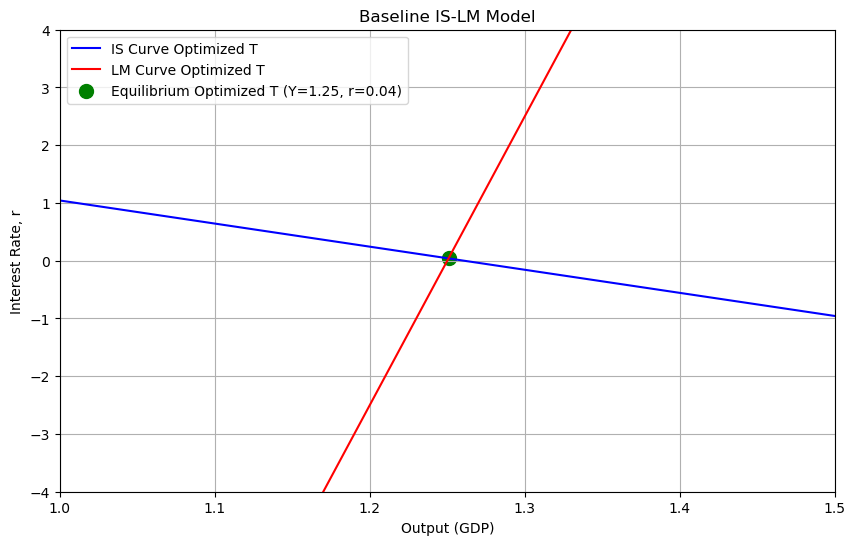

In [438]:
# Initialize the ISLM_alg with specified parameters
model = ISLM_alg(
    a=2, b=0.6, c=2, d=0.1, e=10, f=0.2, T=1, G=1, M=25, P=2
)

# Find initial equilibrium for Y and r
initial_equilibrium = model.find_equilibrium()

# Display the initial equilibrium solutions
print("Initial Equilibrium (Y, r):")
if initial_equilibrium:
    for sol in initial_equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")

# Optimize parameter T to ensure r = 0.04
optimized_T = model.optimize_parameters()
print(f"Optimized Parameter T: {optimized_T[0]}")

# Update the model with the optimized T value
model.T = optimized_T[0]

# Find the new equilibrium for Y and r with optimized parameters
new_equilibrium = model.find_equilibrium()

# Display the new equilibrium solutions
print("Baseline Equilibrium (Y, r) with r = 0.04:")
if new_equilibrium:
    for sol in new_equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")

# Plot the new IS-LM model with optimized T value
print("Plotting baseline IS-LM model with G=1, M=25, and optimized T")
new_IS_r_values, new_LM_r_values = model.store_curves(x_range=(1, 1.5), num_points=100)
model.plot(x_range=(1, 1.5), num_points=100, label_suffix='Optimized T', IS_r_values=new_IS_r_values, LM_r_values=new_LM_r_values, equilibrium=new_equilibrium, y_range=(-4, 4))

We now have the baseline model that we can use to ccomparison. This Baseline model have an interest rate at r=0.04, which we choose. To satisfy this interest rate we need the the Lumpsum tax to be T=7.49. In equilibrium we have Y=1.25. 

#### Analysis part 2: Creating a fiscal shock ####

**Find the equilibrium with the fiscal shoch**:
   - First we set G=1.1, which equals an inrease of 10$%$. We make the increse relativly big, to show the dynamics of the model. 
   - Secondly we calculate the equilibrium with the fiscal shock

**Plot the equilibrium with the fiscal shcok and the baseline model**:
   - Lastly we plot the equilibrium with the fiscal shock in the same graph as our baseline model to see the changes. 

Equilibrium (Y, r) with G=1.1:



IS-LM Model with fiscal shock (increase in G)


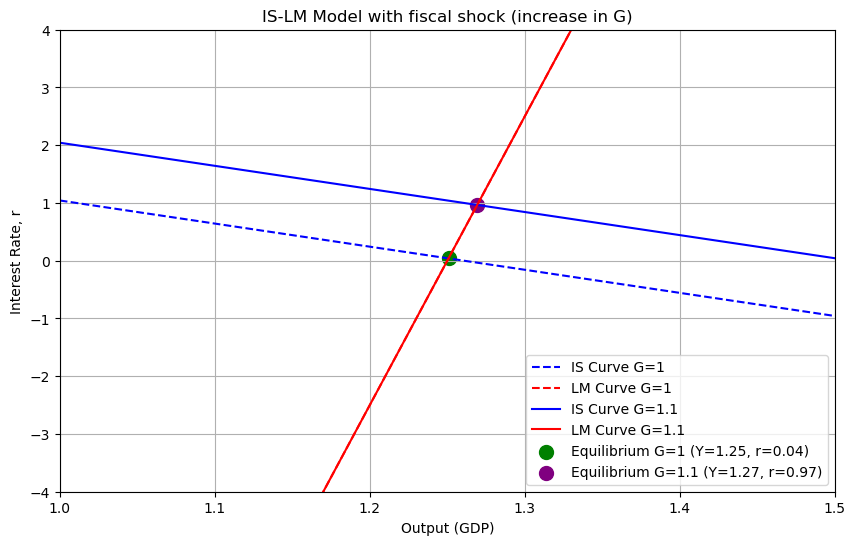

In [439]:
# Update G to 1.1 and find the new equilibrium for Y and r
model.G = 1.1
new_equilibrium_G1_1 = model.find_equilibrium()

# Display the new equilibrium solutions for G=1.1
print("Equilibrium (Y, r) with G=1.1:")
if new_equilibrium_G1_1:
    for sol in new_equilibrium_G1_1:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found for G=1.1.")

# Compare the IS curves for G=1 and G=1.1
print()
model.compare_G_changes(initial_G=1, new_G=1.1, x_range=(1, 1.5), num_points=100, y_range=(-4, 4))

The fiscal shock raises the interest rate to r=0.97 (with the lump-sum tax T=7.49 remaining unchanged) and output Y to 1.25. Increased government spending in a closed economy causes an upward shift in the IS curve due to higher demand. To clear the markets, the interest rate must rise to offset the increased demand. Consequently, we observe only a slight increase in Y because the higher interest rate dampens investment and consumption, partially counteracting the initial boost in demand from government spending. The increased interest rate curtails borrowing and spending by businesses and consumers, limiting the overall growth in output.

#### Analysis part 3: Creating a monetary shock ####

**Find the equilibrium with the monetary shoch**:
   - First we set M=27.5, which equals an inrease of 10%, the same increase we did for G. We make the increse relativly big, to show the dynamics of the model. 
   - Secondly we calculate the equilibrium with the monetary shock

**Plot the equilibrium with the monetary shcok and the baseline model**:
   - Lastly we plot the equilibrium with the monetary shock in the same graph as our baseline model to see the changes. 

New Equilibrium (Y, r) with M=27.5:



IS-LM Model with fiscal shock (increase in M)


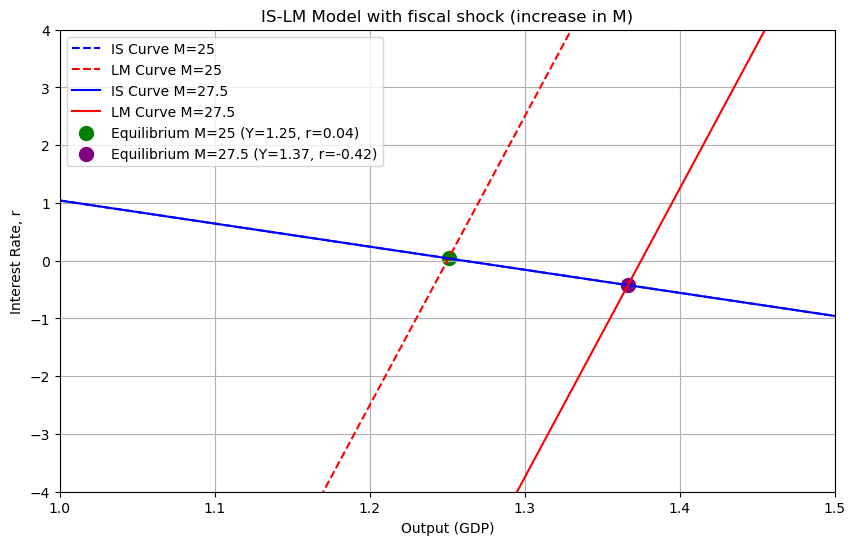

In [440]:
# Update M to 27.5 and find the new equilibrium for Y and r
model.M = 27.5
new_equilibrium_M27_5 = model.find_equilibrium()

# Display the new equilibrium solutions for M=27.5
print("New Equilibrium (Y, r) with M=27.5:")
if new_equilibrium_M27_5:
    for sol in new_equilibrium_M27_5:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found for M=27.5.")

# Compare the IS curves for M=25 and M=27.5
print()
model.compare_M_changes(initial_M=25, new_M=27.5, x_range=(1, 1.5), num_points=100, y_range=(-4, 4))

The monetary shock decreases the interest rate to r=−0.42 (with the lump-sum tax T=7.49 remaining unchanged) and increases output Y to 1.37. An increased money supply in a closed economy leads to a rightward shift in the LM curve due to the higher availability of money. To clear the markets, the interest rate must decrease to balance the increased money supply. This results in an increase in Y, as the lower interest rates encourage more investment and consumption, driving higher overall economic output.

## Further analysis: IS-LM model for an open economy

This futher analysis opens up the economy by implementing the Net Export (NX) and the exchnge rate (epsilon). 

The equiations for the model are as follows:

1. **Planned expenditures on goods and services:** $$PE = C + I + \bar{G}+NX$$
2. **Private consumption of goods:** $$C = a + b(Y-\bar{T})$$
3. **Equilibrium in the goods market:** $$Y = PE$$
4. **Investment demand:** $$I = c - d r$$
5. **Net export** $$NX = g - h \epsilon$$
6. **Equilibrium condition in the money market:** $$\frac{\bar{M}}{\bar{P}} = L$$
7. **Real demand for money:** $$L = e Y - f r$$
8. **Production function:** $$Y = g N$$

The equation for PE does now depend positively on NX. NX is given by some parameter g and h and is negativly impacted by the exchange rate epsilon. 

#### Further analysis part 1: IS-LM equations for the open economy ####

**Initialize the new parameters**:
   - We initialize the new parameters in the model for the open economy. 

**Derive IS and LM curve solutions**:
   - The derive_IS_open method is called to derive solutions for the IS curve.
   - The derive_LM method_open is called to derive solutions for the LM curve.
   - The solutions for the output (Y) and the interest rate (r) are stored in IS_solution_Y_open, IS_solution_r_open, LM_solution_Y_open, and LM_solution_r_open.

**Display IS and LM curve solutions**:
   - The solutions for \( Y \) and \( r \) from the IS and LM curves are displayed.


IS Curve Solution (Y):


IS Curve Solution (r):


LM Curve Solution (Y):


LM Curve Solution (r):


Equilibrium Solutions:


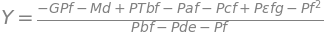

In [441]:
L, Y, r, PE, C, I, NX = sp.symbols('L Y r PE C I NX')

model.initialize_parameters(
    a=a, b=b, c=c, d=d, f=f, g=g, epsilon=epsilon, e=e, M=M, P=P, 
    L=L, T=T, Y=Y, r=r, PE=PE, C=C, I=I, G=G, NX=NX
)

# Derive and display the IS and LM equations for the open economy
IS_eq_open = model.derive_IS_open()
LM_eq_open = model.derive_LM_open()

# Solve for Y from IS and LM equations
IS_solution_Y_open = sp.solve(IS_eq_open, model.Y)
LM_solution_Y_open = sp.solve(LM_eq_open, model.Y)

# Solve for r from IS and LM equations
IS_solution_r_open = sp.solve(IS_eq_open, model.r)
LM_solution_r_open = sp.solve(LM_eq_open, model.r)

# Display the IS curve solutions for Y
print("IS Curve Solution (Y):")
if IS_solution_Y_open:
    for sol in IS_solution_Y_open:
        display(sp.Eq(model.Y, sol))

# Display the IS curve solutions for r
print("IS Curve Solution (r):")
if IS_solution_r_open:
    for sol in IS_solution_r_open:
        display(sp.Eq(model.r, sol))

# Display the LM curve solutions for Y
print("LM Curve Solution (Y):")
if LM_solution_Y_open:
    for sol in LM_solution_Y_open:
        display(sp.Eq(model.Y, sol))

# Display the LM curve solutions for r
print("LM Curve Solution (r):")
if LM_solution_r_open:
    for sol in LM_solution_r_open:
        display(sp.Eq(model.r, sol))

# Find equilibrium (Y, r) in terms of the parameters
equilibrium_open = model.find_equilibrium_open()
print("Equilibrium Solutions:")
if equilibrium_open:
    for sol in equilibrium_open:
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))

#### Further analysis part 2: Baseline model of the open economy ####

In the following part we simulate the IS_LM model for the open economy by using the parameter values from the Baseline model for the closed economy and adding random values to the new parameters. 

**Find initial equilibrium**:
   - First we find the initial equilibrium for Y and r given the paramter values that we have set. We also display these.

**Find the new equilibrium**:
   - Afterwards we optimize the taxrate T to find the value of T that gives us a realistic interest rate r=0.04, to make the simulation more representative to a real-world economy.

**Plot the new equilibrium**:
   - Lastly we plot the new equilibrium as this will be the baseline for the ongoing analysis. 

Initial Equilibrium (Y, r):


Optimized Parameter T: 9.523242187500017
Baseline Equilibrium open economy (Y, r) with r = 0.04:


Baseline IS_Lm model for the open economy


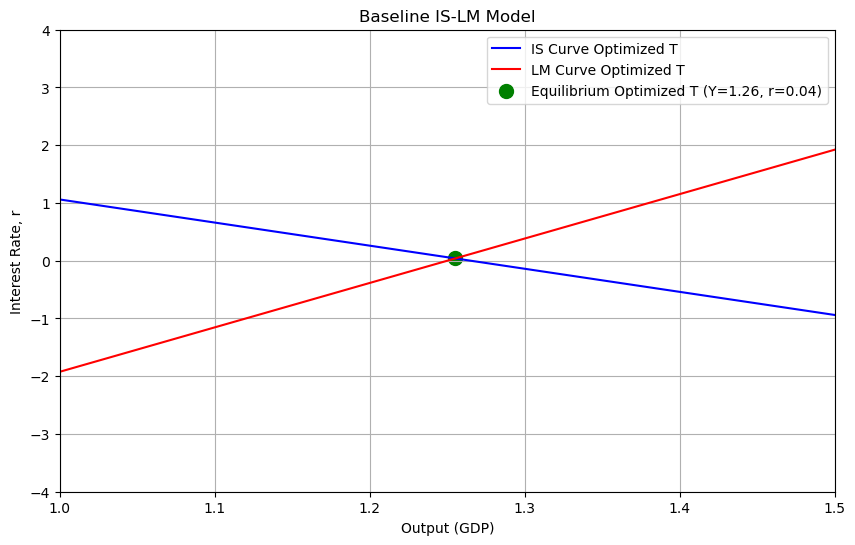

In [443]:
# Initialize additional parameters for the open economy
model.initialize_parameters(
    a=2, b=0.6, c=2, d=0.1, f=1.3, g=0.2, epsilon=0.4, e=10, M=25, P=2, 
    L=sp.symbols('L'), T=1, Y=sp.symbols('Y'), r=sp.symbols('r'), 
    PE=sp.symbols('PE'), C=sp.symbols('C'), I=sp.symbols('I'), 
    G=1, NX=sp.symbols('NX')
)

# Solve for Y from IS and LM equations
IS_solution_Y_open = sp.solve(IS_eq_open, model.Y)
LM_solution_Y_open = sp.solve(LM_eq_open, model.Y)

# Solve for r from IS and LM equations
IS_solution_r_open = sp.solve(IS_eq_open, model.r)
LM_solution_r_open = sp.solve(LM_eq_open, model.r)

# Find initial equilibrium for Y and r
initial_equilibrium = model.find_equilibrium_open()

# Display the initial equilibrium solutions
print("Initial Equilibrium (Y, r):")
if initial_equilibrium:
    for sol in initial_equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")

# Optimize parameter T to ensure r = 0.04
optimized_T = model.optimize_parameters_open()
print(f"Optimized Parameter T: {optimized_T[0]}")

# Update the model with the optimized T value
model.T = optimized_T[0]

# Find the new equilibrium for Y and r with optimized parameters
new_equilibrium = model.find_equilibrium_open()

# Display the new equilibrium solutions
print("Baseline Equilibrium open economy (Y, r) with r = 0.04:")
if new_equilibrium:
    for sol in new_equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")

# Plotting new IS-LM model with optimized T value
print("Baseline IS_Lm model for the open economy")
new_IS_r_values, new_LM_r_values = model.store_curves_open(x_range=(1, 1.5), num_points=100)

# Using the existing plot method to visualize the IS-LM model
model.plot(x_range=(1, 1.5), num_points=100, label_suffix='Optimized T', 
           IS_r_values=new_IS_r_values, LM_r_values=new_LM_r_values, 
           equilibrium=new_equilibrium, y_range=(-4, 4))


In the open economy with a fixed exchange rate and a  interest rate set at r=0.04, the lump-sum tax T is higher than in the closed economy. Specifically, T must be higher to offset the increased capital inflows that occur due to the the interest rate at 0.04, which could otherwise lead to an overheating of the economy and an excessive demand that would put upward pressure on the interest rate.

With the lump-sum tax T adjusted accordingly, output Y is slightly higher in the open economy compared to the closed economy. This is because, in an open economy, there is an additional channel of external trade that boosts economic activity. The fixed exchange rate helps stabilize trade flows, while the set interest rate ensures that investment remains consistent. This combination supports higher aggregate demand, leading to a slight increase in Y compared to the closed economy, where such external trade benefits are absent.